In [105]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest, confint_proportions_2indep
from scipy.stats import chisquare
import scipy


In [106]:
df = pd.read_csv('AdSmartABdata - AdSmartABdata.csv')  # Membaca file CSV 'adsmart.csv' dan menyimpannya ke dalam DataFrame df
df.head()  # Menampilkan lima baris pertama dari DataFrame df


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [108]:
df['date'] = pd.to_datetime(df['date'])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   auction_id   8077 non-null   object        
 1   experiment   8077 non-null   object        
 2   date         8077 non-null   datetime64[ns]
 3   hour         8077 non-null   int64         
 4   device_make  8077 non-null   object        
 5   platform_os  8077 non-null   int64         
 6   browser      8077 non-null   object        
 7   yes          8077 non-null   int64         
 8   no           8077 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 568.0+ KB


In [110]:
min_date = df['date'].min()
print(min_date)

2020-07-03 00:00:00


In [111]:
max_date = df['date'].max()
print(max_date)

2020-07-10 00:00:00


In [112]:
data = {
    'Data Feature': df.columns,
    'Data Type': df.dtypes,
    'Null Values': df.isnull().sum(),
    'Total Unique': df.nunique(),
    'Unique Sample': df.apply(lambda col: col.unique().tolist(), axis=0)
}

df_informasi = pd.DataFrame(data)
df_informasi

,Data Feature,Data Type,Null Values,Total Unique,Unique Sample
auction_id,auction_id,object,0,8077,"[0008ef63-77a7-448b-bd1e-075f42c55e39, 000eabc..."
experiment,experiment,object,0,2,"[exposed, control]"
date,date,datetime64[ns],0,8,"[2020-07-10 00:00:00, 2020-07-07 00:00:00, 202..."
hour,hour,int64,0,24,"[8, 10, 2, 15, 5, 0, 14, 13, 6, 16, 7, 20, 4, ..."
device_make,device_make,object,0,269,"[Generic Smartphone, E5823, Samsung SM-A705FN,..."
platform_os,platform_os,int64,0,3,"[6, 5, 7]"
browser,browser,object,0,15,"[Chrome Mobile, Chrome Mobile WebView, Faceboo..."
yes,yes,int64,0,2,"[0, 1]"
no,no,int64,0,2,"[0, 1]"


#### Clean Data

Clean data dengan memilih hanya data yang mendapatkan konversi saja dengan kondisi salah satu Column Yes atau No bernilai 1 atau 0

In [113]:
df_clean  = df[(df['yes'] ==1) | (df['no']==1)]
df_clean

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1,0
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0,1
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1,0
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,1
...,...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1,0
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1,0
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0,1
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0,1


In [114]:
df_clean.yes.value_counts()

yes
0    671
1    572
Name: count, dtype: int64

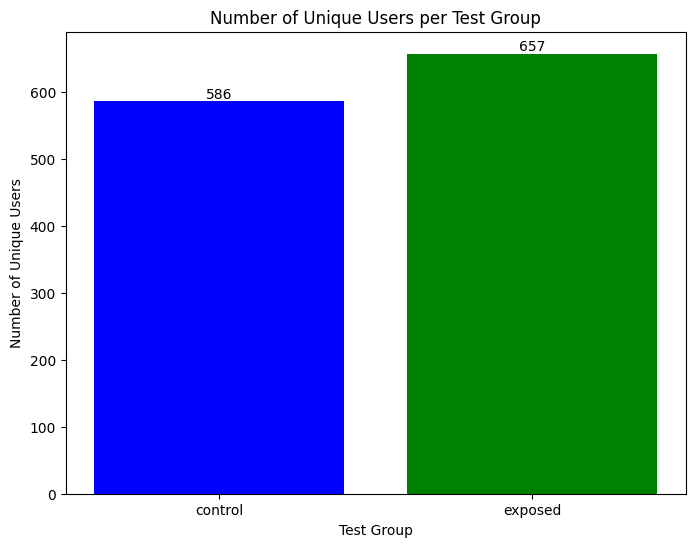

In [115]:
#melihat jumlah data masing masing experiment

n_unique_users = df_clean.groupby(['experiment'])['auction_id'].nunique()


plt.figure(figsize=(8, 6))  # Set the figure size
bars = plt.bar(n_unique_users.index, n_unique_users.values, color=['b', 'g', 'r'])  # Set custom colors

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, yval, ha='center', va='bottom')

plt.xlabel('Test Group')
plt.ylabel('Number of Unique Users')
plt.title('Number of Unique Users per Test Group')
plt.show()

In [116]:
# melihat jumlah exposed dan control terbaru
df_clean['experiment'].value_counts()

experiment
exposed    657
control    586
Name: count, dtype: int64

In [117]:
# Menghapus kolom 'no' dari DataFrame df_clean
df_clean.drop('no', axis=1, inplace=True)

# Mengubah nama kolom 'yes' menjadi 'converted' dalam DataFrame df_clean
df_clean.rename(columns={'yes':'converted'}, inplace=True)

# Menampilkan lima baris pertama dari DataFrame df_clean setelah perubahan
df_clean.head()


<ipython-input-117-06f363bcb5d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop('no', axis=1, inplace=True)
<ipython-input-117-06f363bcb5d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.rename(columns={'yes':'converted'}, inplace=True)


,auction_id,experiment,date,hour,device_make,platform_os,browser,converted
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0


Jumlah converted lebih tinggi dikarenakan jumlah id yang lebih banyak hal itu yang menyebabkan converted exposed lebih tinggi


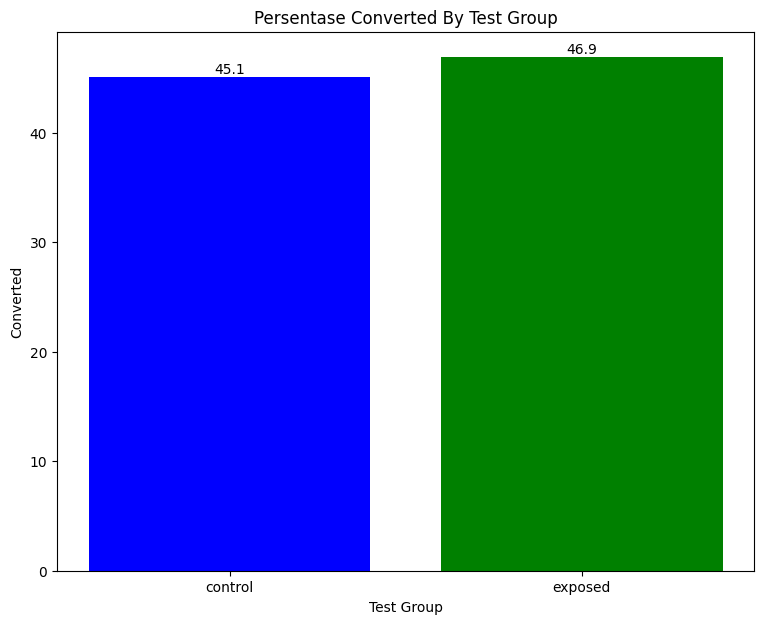

In [118]:
n_unique_users = df_clean.groupby(['experiment'])['converted'].mean() * 100

plt.figure(figsize=(9, 7))  # Mengatur ukuran gambar plot (lebar=9 inch, tinggi=7 inch)
bars = plt.bar(n_unique_users.index, n_unique_users.values, color=['b', 'g', 'r'])  # Menetapkan warna batang diagram

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, f'{yval:.1f}', ha='center', va='bottom')

plt.xlabel('Test Group')  # Memberi label sumbu x dengan 'Test Group'
plt.ylabel('Converted')  # Memberi label sumbu y dengan 'Converted'
plt.title('Persentase Converted By Test Group')  # Memberi judul plot dengan 'Persentase Converted By Test Group'
plt.show()  # Menampilkan plot


In [119]:
df_clean

,auction_id,experiment,date,hour,device_make,platform_os,browser,converted
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0
...,...,...,...,...,...,...,...,...
8059,ffa08ff9-a132-4051-aef5-01a9c79367bc,exposed,2020-07-05,21,Generic Smartphone,6,Chrome Mobile,1
8063,ffb176df-ecd2-45d3-b05f-05b173a093a7,exposed,2020-07-04,1,Generic Smartphone,6,Chrome Mobile,1
8064,ffb79718-6f25-4896-b6b3-e58b80a6e147,control,2020-07-09,7,Generic Smartphone,6,Chrome Mobile,0
8069,ffca1153-c182-4f32-9e90-2a6008417497,control,2020-07-10,16,Generic Smartphone,6,Chrome Mobile,0


###Sample Ratio Missmatch


std_dev dibawah ditulis berdasarkan perkiraan dari industri yang sama dikarenakan tidak ditemukanya std_dev dari data historis sebelumnya

https://medium.com/@ibtesamahmex/the-ab-testing-cookbook-part-2-b53801561fce

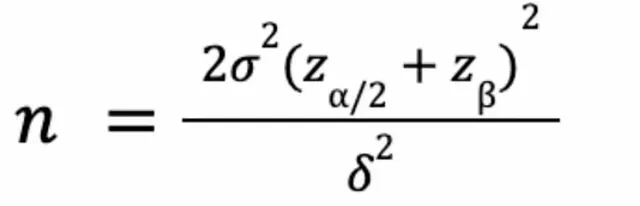

n : the sample size we want to calculate
α and β are already mentioned here, the formula just uses their z-scores.

σ : estimate of variance in control group. This can be estimated from historical data. In case there is no historical data, you can run an A/A test first to get variance.

δ : this is the practical significance or the minimum detectable effect agreed upon by stakeholders.

In [120]:
delta = 0.01  # Selisih minimum yang ingin dideteksi
alpha = 0.05  # Tingkat signifikansi (nilai alpha)
power = 0.8   # Daya uji (1 - nilai beta)
std_dev = 0.05  # Standar deviasi (asumsi)

beta = 1 - power  # Menghitung nilai beta

# Menghitung nilai z untuk nilai kritis alpha dan beta menggunakan distribusi normal standar
z_alpha = stats.norm.ppf(1 - alpha/2)  # z untuk alpha/2 (dua sisi)
z_beta = stats.norm.ppf(1 - beta)      # z untuk beta

# Menghitung jumlah minimum sampel yang dibutuhkan menggunakan formula kuadratik
n = 2 * (std_dev**2) * ((z_alpha + z_beta)**2) / (delta**2)

# Menampilkan hasil dengan jumlah sampel yang dibutuhkan sebagai bilangan bulat
print(f'Jumlah minimum sample yang dibutuhkan per kelompok varian adalah {n:.0f} sample')


Jumlah minimum sample yang dibutuhkan per kelompok varian adalah 392 sample


delta: Besarnya perbedaan yang signifikan yang ingin dideteksi.

alpha: Tingkat signifikansi yang diinginkan untuk uji hipotesis (misalnya 0.05 untuk 5%).

power: Daya statistik dari uji (misalnya 0.8 untuk 80%).
std_dev: Deviasi standar yang diasumsikan untuk data.

beta: Tingkat kesalahan tipe II.

z_alpha dan z_beta: Nilai kritis dari distribusi normal standar untuk alpha dan beta.

n: Jumlah minimum sampel yang diperlukan per kelompok untuk mencapai daya statistik yang diinginkan

##Pengambilan Sampel Data

In [121]:
n = int(round(n))  # Membulatkan nilai n ke bilangan bulat terdekat
data_control = df_clean[df_clean['experiment'] == 'control']
data_control = data_control.sample(n=n, random_state=42)

data_exposed = df_clean[df_clean['experiment'] == 'exposed']
data_exposed = data_exposed.sample(n=n, random_state=42)

In [122]:
data_control.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,converted
7226,e58ffe4a-df41-4b5a-a309-9b8d0ce64976,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0
4109,8404f313-ea2c-410f-aa53-3f527cf94139,control,2020-07-10,15,Samsung SM-A105FN,6,Samsung Internet,1
7152,e3499355-c235-47af-ad5e-e98c06227867,control,2020-07-05,5,Generic Smartphone,6,Chrome Mobile,0
4845,9a97b477-c294-4234-8449-a92da02b60bd,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0
3193,67462dcc-3c3c-4640-b3f5-f9b0cfa2ce0a,control,2020-07-09,10,Samsung SM-G960F,6,Facebook,1


In [123]:
data_exposed.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,converted
7745,f55effb2-dbb4-4d95-b759-668829ec3ae2,exposed,2020-07-08,4,Samsung SM-J530F,6,Samsung Internet,1
3478,70361a09-0b73-48d0-afc4-96db1d775032,exposed,2020-07-04,11,Nokia undefined$2$3,6,Chrome Mobile,1
3843,7c003bed-32c3-4236-abf0-f571debe769b,exposed,2020-07-05,3,iPhone,5,Mobile Safari,1
833,1b08c023-6b5a-4652-9cae-8c5895951d54,exposed,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0
3920,7e217480-6a52-4e39-8d0d-9b0dea622668,exposed,2020-07-03,3,Samsung SM-G975F,6,Chrome Mobile WebView,1


In [124]:
# Menghitung jumlah pengguna dalam kelompok kontrol (data_control)
jumlah_kontrol = data_control.shape[0]

# Menghitung jumlah pengguna dalam kelompok treatment (data_exposed)
jumlah_exposed = data_exposed.shape[0]

# Menampilkan jumlah pengguna dalam format yang jelas
print(f'Jumlah user di kelompok control    : {jumlah_kontrol} users')
print(f'Jumlah user di kelompok treatment  : {jumlah_exposed} users')


Jumlah user di kelompok control    : 392 users
Jumlah user di kelompok treatment  : 392 users


In [125]:
print(data_control.shape)
print(data_exposed.shape)

(392, 8)
(392, 8)


###Pengujian Chi-Square

In [126]:
# Misalkan jumlah_kontrol dan jumlah_exposed telah didefinisikan sebelumnya
# Menggunakan nilai yang sama dengan contoh sebelumnya
jumlah_kontrol = jumlah_kontrol
jumlah_exposed = jumlah_exposed

# Definisikan variabel untuk nilai yang diamati dan nilai yang diharapkan
nilai_observed = [jumlah_kontrol, jumlah_exposed]
total_= sum(nilai_observed)
nilai_diharapkan = [total_ / 2, total_ / 2]

# Hitung statistik chi-square
statistik_chi, p_value = chisquare(nilai_observed, f_exp=nilai_diharapkan)
print(f"Chi-square Statistic: {statistik_chi:.4f}")
print(f"P-value: {p_value:.4f}")


Chi-square Statistic: 0.0000
P-value: 1.0000




total_: Total dari kedua kelompok.

nilai_diharapkan: Nilai yang diharapkan jika tidak ada perbedaan antara kelompok.

statistik_chi: Hasil uji chi-square untuk menguji apakah distribusi observasi berbeda secara signifikan dari distribusi yang diharapkan.

##Penentuan Critical Value Chi-Square

In [127]:
# Tentukan tingkat signifikansi (alpha level)
alpha = 0.01

# Tentukan jumlah kelompok (contingency table) untuk uji chi-square
# Misalnya, jika Anda memiliki tabel kontingensi 2x2, df akan menjadi (2-1)*(2-1) = 1
df = (2 - 1) * (2 - 1)

# Hitung nilai kritis chi-square berdasarkan alpha dan derajat kebebasan (df)
nilai_kritis_chi = scipy.stats.chi2.ppf(1 - alpha, df)

# Cetak nilai kritis chi-square dengan tiga desimal
print(f"Critical Value: {nilai_kritis_chi:.3f}")


Critical Value: 6.635


*   Variabel alpha ditetapkan sebagai tingkat signifikansi yang diinginkan untuk pengujian chi-square.

*   Variabel df menentukan derajat kebebasan untuk pengujian chi-square. Dalam contoh ini, kita menggunakan tabel kontingensi 2x2, sehingga df dihitung sebagai (2-1)*(2-1) = 1. Ini sesuai dengan 1 derajat kebebasan untuk pengujian chi-square pada tabel 2x2.

*   scipy.stats.chi2.ppf(1 - alpha, df) menghitung nilai kritis chi-square berdasarkan probabilitas kumulatif (1 - alpha) dan derajat kebebasan (df). Ini adalah nilai chi-square yang akan digunakan sebagai nilai batas untuk menentukan apakah hasil pengujian chi-square signifikan atau tidak.







###Pengambilan Keputusan

**Keputusan berdasarkan perbandingan statistik chi-square dengan nilai kritis**

Hipotesis Nol (H0): Tidak ada perbedaan signifikan antara jumlah pengguna yang dikonversi antara kelompok kontrol dan kelompok treatment (exposed).

Hipotesis Alternatif (H1): Terdapat perbedaan signifikan antara jumlah pengguna yang dikonversi antara kelompok kontrol dan kelompok treatment (exposed).

**Keputusan berdasarkan perbandingan nilai p dengan alpha**

Hipotesis Nol (H0): Tidak ada perbedaan signifikan antara jumlah pengguna yang dikonversi antara kelompok kontrol dan kelompok treatment (exposed).

Hipotesis Alternatif (H1): Terdapat perbedaan signifikan antara jumlah pengguna yang dikonversi antara kelompok kontrol dan kelompok treatment (exposed).

In [128]:
# Keputusan berdasarkan perbandingan statistik chi-square dengan nilai kritis
if statistik_chi > nilai_kritis_chi:
    print("Hipotesis nol ditolak: Terdapat bukti kuat adanya perbedaan signifikan antara kelompok.")
else:
    print("Gagal menolak hipotesis nol: Tidak ada cukup bukti untuk menyatakan adanya perbedaan signifikan antara kelompok.")

# Keputusan berdasarkan perbandingan nilai p dengan alpha
if p_value < alpha:
    print("Hipotesis nol ditolak: Terdapat bukti kuat adanya perbedaan signifikan antara kelompok.")
else:
    print("Gagal menolak hipotesis nol: Tidak ada cukup bukti untuk menyatakan adanya perbedaan signifikan antara kelompok.")

Gagal menolak hipotesis nol: Tidak ada cukup bukti untuk menyatakan adanya perbedaan signifikan antara kelompok.
Gagal menolak hipotesis nol: Tidak ada cukup bukti untuk menyatakan adanya perbedaan signifikan antara kelompok.


Menggunakan nilai statistik chi-square dan nilai kritis chi-square untuk menentukan apakah ada cukup bukti untuk menolak hipotesis nol (tidak ada perbedaan signifikan antara kelompok).

#Analisis AB Testing

analisis untuk membuktikan adanya perbedaan antara Control dan Exposed

Melihat jumlah yang mengklik button yes dan melihat conversion rate dari Group Control

In [129]:
total_conversion_rate_control = data_control[data_control['converted'] == 1]['converted'].sum() / data_control['converted'].count()  # Menghitung rasio konversi dalam kelompok kontrol
total_conversion_rate_control

0.4413265306122449

In [130]:
# Menghitung jumlah total konversi dalam kelompok kontrol
data_control_converted = data_control[data_control['converted'] == 1]['converted'].sum()

# Menghitung rasio konversi dalam kelompok kontrol
total_data_control_yes = data_control['converted'].count()
total_konversi_control = data_control_converted / total_data_control_yes

total_konversi_control, data_control_converted


(0.4413265306122449, 173)

Melihat jumlah yang mengklik button yes dan melihat conversion rate dari Group Converted

In [131]:
# Menghitung jumlah total konversi dalam kelompok exposed
data_exposed_converted = data_exposed[data_exposed['converted'] == 1]['converted'].sum()

# Menghitung rasio konversi dalam kelompok exposed
total_data_exposed_yes = data_exposed['converted'].count()
total_konversi_exposed = data_exposed_converted / total_data_exposed_yes

total_konversi_exposed, data_exposed_converted


(0.4642857142857143, 182)

In [132]:
data = {
    'Group': ['Control', 'Exposed'],  # Nama kelompok
    'Total User': [jumlah_kontrol, jumlah_exposed],  # Jumlah total pengguna dalam masing-masing kelompok
    'Total Unique Konversi': [data_control_converted, data_exposed_converted],  # Jumlah total konversi unik dalam masing-masing kelompok
    'Conversion Rate': [total_konversi_control, total_konversi_exposed],  # Rasio konversi dalam masing-masing kelompok
}

df_informasi = pd.DataFrame(data)  # Membuat DataFrame dari dictionary 'data'
df_informasi  # Menampilkan DataFrame

,Group,Total User,Total Unique Konversi,Conversion Rate
0,Control,392,173,0.441327
1,Exposed,392,182,0.464286


Dari data yang ditampilkan di atas, terlihat bahwa kelompok exposed memiliki tingkat konversi yang lebih tinggi dibandingkan dengan kelompok control. Namun, hasil ini belum cukup untuk menyimpulkan bahwa kelompok exposed secara signifikan lebih baik daripada kelompok control. Oleh karena itu, dilakukan uji statistik untuk mendapatkan pemahaman yang lebih mendalam dan objektif.

#Uji Statistik



*   Hipotesis Nol (H0): Tingkat konversi (CR) pada tampilan interaktif <= tingkat konversi pada tampilan statis.
*   Hipotesis Alternatif (H1): Tingkat konversi (CR) pada tampilan interaktif > tingkat konversi pada tampilan statis.


In [133]:
# Total konversi dalam kelompok control dan exposed
total_convert = [data_control_converted, data_exposed_converted]
print(total_convert)
# Definisi alternatif bahwa kelompok exposed memiliki nilai rata-rata yang lebih besar dari kelompok control
alternative_option = "larger"

[173, 182]


alternative_option = "larger": Mendefinisikan variabel alternative_option sebagai string "larger". Ini menunjukkan bahwa uji statistik yang akan dilakukan akan menguji apakah nilai rata-rata dalam kelompok exposed lebih besar dari pada kelompok control.

In [134]:
# Melakukan uji z-test untuk perbandingan
# ztest akan mengembalikan nilai z-stat dan p-value
z_stat, p_value = proportions_ztest(count = total_convert,
                                    nobs = nilai_observed,
                                    alternative = alternative_option)


# Menampilkan hasil uji statistik
print(f"Hasil uji Z-stats: {z_stat:.4f}")
print(f"Nilai p-value: {p_value:.4f}")

Hasil uji Z-stats: -0.6457
Nilai p-value: 0.7408


count adalah jumlah total konversi dalam masing-masing kelompok (total_convert), nobs adalah jumlah total pengamatan atau total jumlah data yang dihitung (nilai_observed), dan alternative adalah pilihan alternatif untuk arah uji hipotesis.

In [135]:
# menghitung selisih antara rasio konversi kelompok exposed dengan kelompok control
total_konversi_exposed - total_konversi_control

0.022959183673469385

In [136]:
# Menghitung relative effect dari dua kelompok dalam analisis A/B testing
relative_effect = (total_konversi_exposed - total_konversi_control) / total_konversi_control * 100

# Menampilkan nilai relative effect dengan format tiga angka desimal
print(f"relative effect = {relative_effect:.3} %")


relative effect = 5.2 %


In [137]:
# Nilai alpha atau tingkat kepercayaan yang ditetapkan
alpha = 0.05

# Keputusan berdasarkan nilai p-value dan alpha
if p_value < alpha:
    print("Hipotesis nol ditolak: Terdapat cukup bukti untuk menyatakan bahwa ada perbedaan signifikan antara kelompok.")
else:
    print("Gagal menolak hipotesis nol: Tidak cukup bukti untuk menyatakan adanya perbedaan signifikan antara kelompok.")


Gagal menolak hipotesis nol: Tidak cukup bukti untuk menyatakan adanya perbedaan signifikan antara kelompok.


In [138]:
alpha = 0.05  # Tingkat signifikansi atau tingkat kepercayaan yang ditetapkan

# Menghitung nilai kritis z berdasarkan alpha
z_critical = stats.norm.ppf(1 - alpha)

print(f"Nilai kritis z untuk alpha = {alpha}: {z_critical:.3f}")

Nilai kritis z untuk alpha = 0.05: 1.645


In [139]:
# Keputusan berdasarkan z-statistics, z_critical, dan alpha
if z_stat > z_critical:
    print("Hipotesis nol ditolak: Terdapat cukup bukti untuk menyatakan bahwa ada perbedaan signifikan antara kelompok.")
else:
    print("Gagal menolak hipotesis nol: Tidak cukup bukti untuk menyatakan adanya perbedaan signifikan antara kelompok.")


Gagal menolak hipotesis nol: Tidak cukup bukti untuk menyatakan adanya perbedaan signifikan antara kelompok.


In [140]:
confidence_interval = confint_proportions_2indep(count1=data_control_converted, nobs1=jumlah_kontrol,
                                                 count2=data_exposed_converted, nobs2=jumlah_exposed,
                                                 compare='diff', alpha=0.05)

print(confidence_interval)

(-0.09213807829854763, 0.046531988862768464)


## **Berdasarkan hasil uji statistik yang diperoleh, berikut adalah kesimpulan yang dapat diambil:**

### **Hasil Uji Z-Stats dan P-Value**
Hasil uji Z-stats: -0.6457
Nilai p-value: 0.7408
Nilai kritis z untuk alpha = 0.05: 1.645
Keputusan:

**Uji Z-Stats vs Nilai Kritis Z:**



*   Nilai Z-stats yang dihitung adalah -0.6457, yang lebih kecil dari nilai kritis z sebesar 1.645.
*   Karena Z-stats tidak melebihi nilai kritis z, kita gagal menolak hipotesis nol (H0).





**P-Value vs Alpha:**


*   Nilai p-value yang dihitung adalah 0.7408, yang lebih besar dari alpha sebesar 0.05.
*   Karena p-value lebih besar dari alpha, kita juga gagal menolak hipotesis nol (H0).




## **Kesimpulan Berdasarkan Uji Z-Stats dan P-Value:**


*   H0 (Hipotesis Nol): Tidak ada perbedaan signifikan antara kelompok control dan exposed.
*   H1 (Hipotesis Alternatif): Ada perbedaan signifikan antara kelompok control dan exposed.


Karena kita gagal menolak hipotesis nol berdasarkan hasil uji Z-stats dan nilai p-value, maka kesimpulannya adalah:


*   Tidak ada cukup bukti untuk menyatakan bahwa ada perbedaan signifikan antara kelompok control dan exposed dalam hal konversi.

Confidence Interval
* **Confidence Interval (-0.09213807829854763, 0.046531988862768464)**

Keputusan:

* Confidence interval untuk perbedaan proporsi konversi antara kelompok exposed dan control mencakup nilai nol (0) karena batas bawah interval adalah -0.092 dan batas atas interval adalah 0.047.
* Jika confidence interval mencakup nilai nol, itu berarti perbedaan proporsi konversi antara kedua kelompok bisa jadi tidak berbeda secara signifikan.

**Kesimpulan Berdasarkan Confidence Interval:**

*Interval kepercayaan menunjukkan bahwa perbedaan proporsi konversi antara kelompok exposed dan control berada di antara -9.2% dan 4.7%.
*Karena interval ini mencakup nol, kita tidak dapat menyatakan adanya perbedaan signifikan antara kedua kelompok.

**Kesimpulan Akhir**
Berdasarkan kedua hasil uji statistik (Z-stats dan p-value) serta analisis confidence interval:

* H0 (Hipotesis Nol): Tidak ada perbedaan signifikan antara kelompok control dan exposed.
* H1 (Hipotesis Alternatif): Ada perbedaan signifikan antara kelompok control dan exposed.

Kita gagal menolak hipotesis nol (H0). Dengan kata lain, tidak ada cukup bukti untuk menyatakan bahwa ada perbedaan signifikan dalam tingkat konversi antara kelompok control dan exposed. Perbedaan yang diamati bisa jadi disebabkan oleh variasi acak daripada perubahan yang disebabkan oleh perlakuan dalam eksperimen A/B testing ini.